In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('monthly-milk-production.csv', ';',
                   index_col=['month'], parse_dates=['month'],
                   dayfirst=True)

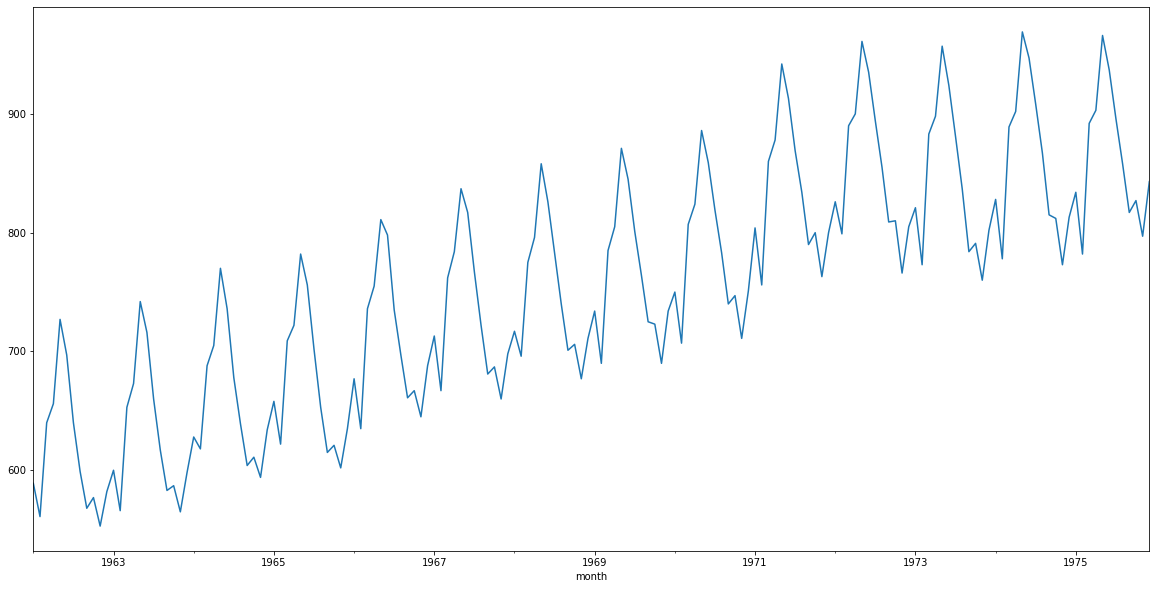

In [15]:
plt.figure(figsize=(20, 10))
data.sort_index()['milk'].plot()

In [19]:
round(sm.tsa.stattools.adfuller(data['milk'])[1], 2)

0.63

In [24]:
data['milk/days'] = data['milk'] / data.index.days_in_month

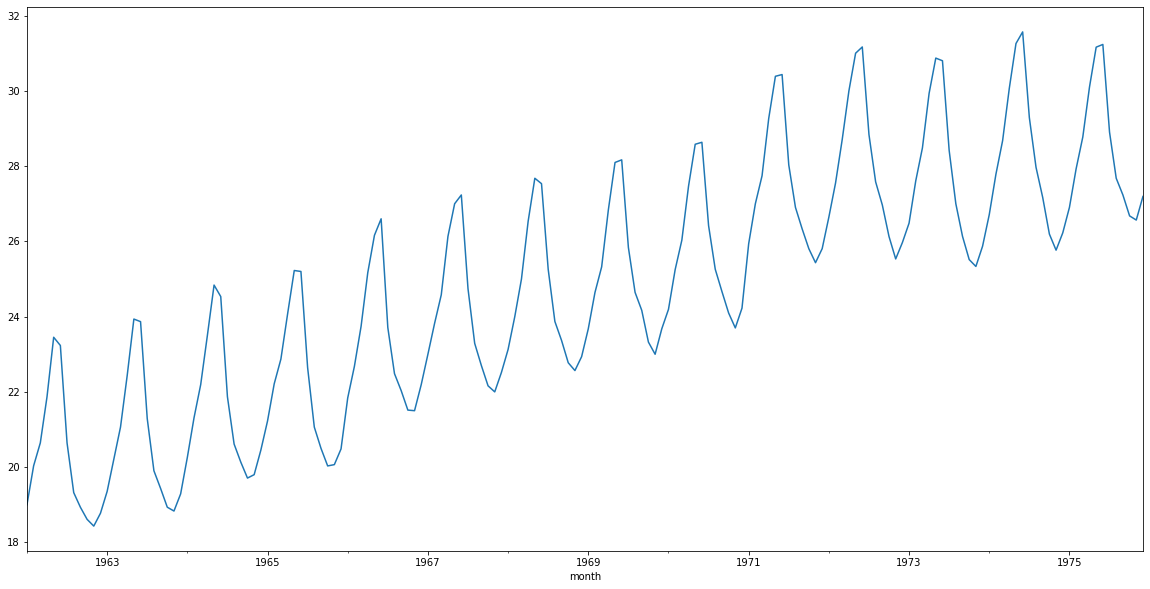

In [25]:
plt.figure(figsize=(20, 10))
data.sort_index()['milk/days'].plot()

In [27]:
round(data['milk/days'].sum(), 2)

4166.33

---

In [65]:
data['stationary'] = data['milk/days'] - data['milk/days'].shift(12)
data['stationary'] = data['stationary'] - data['stationary'].shift(1)

In [66]:
sm.tsa.stattools.adfuller(data['stationary'].dropna())[1]

2.2808455518037347e-06

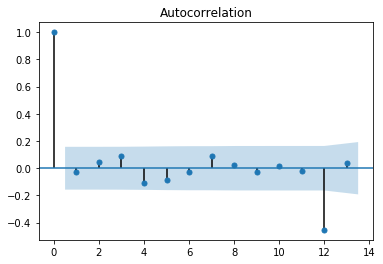

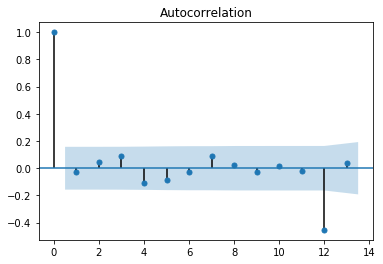

In [69]:
sm.graphics.tsa.plot_acf(data['stationary'].dropna().values.squeeze(), lags=13)

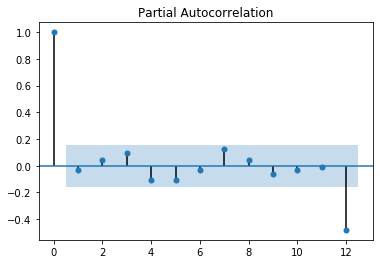

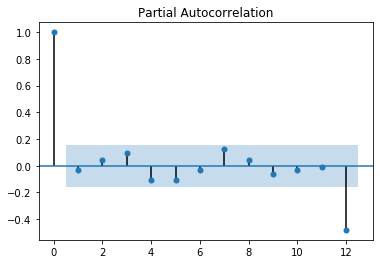

In [70]:
sm.graphics.tsa.plot_pacf(data['stationary'].dropna().values.squeeze(), lags=12)